In [ ]:
Algorithm: Hopfield Network

1. Initialize Hopfield Network
    - Define a class HopfieldNetwork with a constructor that takes the number of neurons as input.
    - Initialize the weight matrix to zeros.

2. Training the Network
    Input: patterns (list of vectors)
    1. For each pattern in patterns:
        1.1 Convert the pattern to a numpy array.
        1.2 Update the weight matrix by adding the outer product of the pattern with itself.
    2. Set the diagonal elements of the weight matrix to 0.

3. Prediction
    Input: test_pattern (input pattern to be predicted), max_iterations (optional)
    1. Convert the test_pattern to a numpy array.
    2. Repeat the following steps for a maximum of max_iterations times:
        2.1 Copy the current pattern as previous pattern.
        2.2 Update the current pattern by applying the sign function to the dot product of the weight matrix and the current pattern.
        2.3 If the updated pattern is equal to the previous pattern, break the loop.
    3. Return the predicted pattern.

4. Example Usage:
    1. Define the number of neurons and patterns.
    2. Create a HopfieldNetwork object.
    3. Train the network with the provided patterns.
    4. Test the network with noisy patterns using the predict method.
    5. Display the original and predicted patterns.


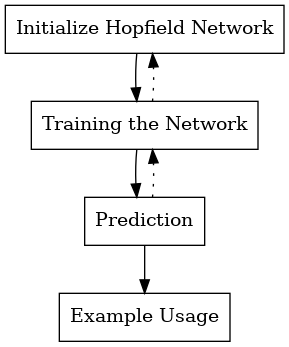

In [1]:
from PIL import Image
Image.open('hopfield.png')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
import numpy as np

class HopfieldNetwork:
  def __init__(self, size):
    self.size = size
    self.weights = np.zeros((size, size))

  def train(self, patterns):
    """
    Trains the network on a list of binary patterns.

    Args:
      patterns: A list of binary vectors (lists or numpy arrays) of size 'size'.
    """
    for pattern1 in patterns:
      for pattern2 in patterns:
        if pattern1 is not pattern2:  # Avoid self-connection
          self.weights += np.outer(pattern1, pattern2)

    # Normalize weights (Hebbian learning with a factor of 1/N)
    self.weights /= self.size

  def update(self, input_vector, iterations=1):
    """
    Updates the network state iteratively based on the input vector.

    Args:
      input_vector: A binary vector of size 'size'.
      iterations: Number of update iterations (default: 1).

    Returns:
      The converged output vector after iterations.
    """
    output_vector = input_vector.copy()
    for _ in range(iterations):
      for i in range(self.size):
        weighted_sum = np.sum(self.weights[i] * output_vector)
        output_vector[i] = 1 if weighted_sum > 0 else -1
    return output_vector

  def recall(self, input_vector):
    """
    Recalls a stored pattern based on a similar input vector.

    Args:
      input_vector: A binary vector of size 'size'.

    Returns:
      The recalled pattern (converged output vector).
    """
    return self.update(input_vector)

# Example usage
network = HopfieldNetwork(4)

# Define 4 binary patterns (replace with your desired patterns)
patterns = [
    [1, -1, 1, -1],
    [-1, 1, -1, 1],
    [1, 1, 1, 1],
    [-1, -1, -1, -1]
]

network.train(patterns)

# Test recall with a noisy version of the first pattern
noisy_pattern = [1, 1, 1, -1]
recalled_pattern = network.recall(noisy_pattern)

print("Original pattern:", patterns[0])
print("Noisy input:", noisy_pattern)
print("Recalled pattern:", recalled_pattern)


Original pattern: [1, -1, 1, -1]
Noisy input: [1, 1, 1, -1]
Recalled pattern: [-1, -1, -1, 1]
